# Sales Prediction
Roshen Abraham Sunny, Sowmika Pulagam

### Introduction
This project will give an opportunity to apply all of the data analytical techniques covered in the class. It will also allow to indulge in working with a comprehensive data base collected from a real business context.

### Project Objective
The main goal is to properly assemble, clean, and manage a set of raw data files about residential real estate properties; once we have integrated and cleaned the dataset, we use programming to build two (or more) types of supervised predictive algorithms in order to estimate the sales price of a list of 100 houses in a holdout sample.

### Data
We have 4 Raw data files containing information from an anonymous United States city assessor’s office that is located in the North West region. The values in the data files are for individual residential real estate properties sold in that city over a time period of 4 years.
These raw data files share one common column "PID"(Property ID), which is a string of 10 numbers denoting the unique ID's of the real estate property; want to use PID as a "primary key".

## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
from numpy import NaN as NA
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib notebook
import sklearn.linear_model as lm
import sklearn.neighbors as knn
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

## Import the data files

In [2]:
property_survey1 = pd.read_csv('Property_Survey_1.csv')
property_survey2 = pd.read_csv('Property_Survey_2.csv')
house_feature = pd.read_csv('House_Feature.csv')
quality_assessment = pd.read_csv('Quality_Assessment.csv')

##### Merging the datasets

In [3]:
survey1_2 = property_survey1.append(property_survey2,ignore_index= True)
survey_feature = house_feature.merge(survey1_2, how='inner', on = 'PID')
finaldata = quality_assessment.merge(survey_feature,how='inner', on='PID')

##### Exploring/ Understanding the dataset

In [4]:
#Columns of the dataset
finaldata.columns

Index(['PID', 'OverallQuality', 'OverallCondition', 'YearBuilt', 'YearRemodel',
       'VeneerExterior', 'BsmtFinTp', 'BsmtFinSqft', 'BsmtUnfinSqft',
       'HeatingQC', 'FstFlrSqft', 'SecFlrSqft', 'AbvGrndLiving',
       'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse', 'BdrmAbvGrnd',
       'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars', 'GarageArea',
       'WdDckSqft', 'OpenPrchSqft', 'SalePrice', 'LotArea', 'LotShape',
       'BldgTp'],
      dtype='object')

In [5]:
#Shape of the dataset
finaldata.shape

(2370, 28)

In [6]:
finaldata.head()

,PID,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,...,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice,LotArea,LotShape,BldgTp
0,526301100,6,5,1960,1960,112,1,639,441,0,...,2,3,2,528,210,62,215000,31770,0,1
1,526350040,5,6,1961,1961,0,1,468,270,1,...,0,3,1,730,140,0,105000,11622,1,1
2,526351010,6,6,1958,1958,108,1,923,406,1,...,0,3,1,312,393,36,172000,14267,0,1
3,526353030,7,5,1968,1968,0,1,1065,1045,3,...,2,3,2,522,0,0,244000,11160,1,1
4,527105010,5,5,1997,1998,0,1,791,137,2,...,1,3,2,482,212,34,189900,13830,0,1


In [7]:
# datatype of the dataset
finaldata.dtypes

PID                 int64
OverallQuality      int64
OverallCondition    int64
YearBuilt           int64
YearRemodel         int64
VeneerExterior      int64
BsmtFinTp           int64
BsmtFinSqft         int64
BsmtUnfinSqft       int64
HeatingQC           int64
FstFlrSqft          int64
SecFlrSqft          int64
AbvGrndLiving       int64
FullBathBsmt        int64
HalfBathHouse       int64
FullBathHouse       int64
BdrmAbvGrnd         int64
RmAbvGrnd           int64
Fireplaces          int64
GarageTp            int64
GarageCars          int64
GarageArea          int64
WdDckSqft           int64
OpenPrchSqft        int64
SalePrice           int64
LotArea             int64
LotShape            int64
BldgTp              int64
dtype: object

In [8]:
# To get the grand count of missing values for the entire dataset "finaldata".
# Sanity Check
print('The dataset has {} missing values.'.format(finaldata.isnull().sum().sum()))

The dataset has 0 missing values.


In [9]:
# To get a detailed count of missing values for each column
finaldata.isna().sum()

PID                 0
OverallQuality      0
OverallCondition    0
YearBuilt           0
YearRemodel         0
VeneerExterior      0
BsmtFinTp           0
BsmtFinSqft         0
BsmtUnfinSqft       0
HeatingQC           0
FstFlrSqft          0
SecFlrSqft          0
AbvGrndLiving       0
FullBathBsmt        0
HalfBathHouse       0
FullBathHouse       0
BdrmAbvGrnd         0
RmAbvGrnd           0
Fireplaces          0
GarageTp            0
GarageCars          0
GarageArea          0
WdDckSqft           0
OpenPrchSqft        0
SalePrice           0
LotArea             0
LotShape            0
BldgTp              0
dtype: int64

In [10]:
#Describe the dataset
finaldata.describe().round(3)

,PID,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,...,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice,LotArea,LotShape,BldgTp
count,2.370000e+03,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,...,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000,2370.000
mean,7.153307e+08,6.051,5.630,1970.571,1984.087,88.144,0.705,429.806,557.102,2.154,...,0.589,2.233,1.719,457.979,91.651,46.003,173730.773,9700.865,0.643,0.877
std,1.886401e+08,1.252,1.096,30.109,20.694,158.719,0.456,408.780,410.685,0.944,...,0.630,1.010,0.709,197.609,120.617,64.246,64080.843,6153.730,0.479,0.328
min,5.263011e+08,2.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,12789.000,1300.000,0.000,0.000
25%,5.313690e+08,5.000,5.000,1953.000,1965.000,0.000,0.000,0.000,239.250,1.000,...,0.000,1.000,1.000,312.000,0.000,0.000,129900.000,7200.000,0.000,1.000
50%,5.354551e+08,6.000,5.000,1972.000,1993.000,0.000,1.000,378.000,470.000,3.000,...,1.000,3.000,2.000,463.000,0.000,25.000,159000.000,9316.000,1.000,1.000
75%,9.071351e+08,7.000,6.000,1999.000,2003.000,144.000,1.000,715.500,792.000,3.000,...,1.000,3.000,2.000,572.000,168.000,68.000,207000.000,11235.000,1.000,1.000
max,1.007100e+09,10.000,9.000,2010.000,2010.000,1600.000,1.000,2085.000,2140.000,3.000,...,4.000,3.000,5.000,1488.000,736.000,547.000,475000.000,159000.000,1.000,1.000


**Observation** from above:
- descriptive stats include `mean`, `std` (standard deviation), `min` and `max`, `median` (50% percentile), and the 1st and 3rd quartiles (25% and 75% percentiles)
1. `mean` of the SalePrice variable is 173730.77
2. No missing values are present in the data

### Correlation

In [11]:
#Checking the correlation for the target variable with other variables.
finaldata.corr()['SalePrice'].sort_values(ascending = False)

SalePrice           1.000000
OverallQuality      0.780217
AbvGrndLiving       0.741919
GarageCars          0.669653
GarageArea          0.652042
FstFlrSqft          0.629534
FullBathHouse       0.590486
YearBuilt           0.585731
RmAbvGrnd           0.527042
YearRemodel         0.525906
Fireplaces          0.462909
GarageTp            0.459829
HeatingQC           0.438989
VeneerExterior      0.415283
BsmtFinSqft         0.384289
OpenPrchSqft        0.334222
HalfBathHouse       0.303561
WdDckSqft           0.293314
LotArea             0.290162
SecFlrSqft          0.284066
FullBathBsmt        0.247587
BdrmAbvGrnd         0.192239
BsmtUnfinSqft       0.158441
BsmtFinTp           0.116483
BldgTp              0.035231
OverallCondition   -0.136934
PID                -0.220939
LotShape           -0.322661
Name: SalePrice, dtype: float64

**Observation** from above:
1. `SalePrice` variable is the target variable. It has the correlation of 1 with itself.
2. `OverallQuality`, `AbvGrndLiving` variables appears to be the best predictor of the target variable SalePrice.
3. Rest of the variables: `GarageCars`, `GarageArea`, `FstFlrSqft`, `FullBathHouse`, `YearBuilt`, `RmAbvGrnd`, `YearRemodel`, `Fireplaces`, `GarageTp`, `HeatingQC`, `VeneerExterior`, `BsmtFinSqft`, `OpenPrchSqft`,`HalfBathHouse`, `WdDckSqft`, `LotArea`, `SecFlrSqft`, `FullBathBsmt` have a medium correlation with the target variable SalePrice.
4. All other variables appear to be weak predictors of target variable  SalePrice.

### Exploratory Data Analysis (EDA)

**Steps to conduct the EDA**

1. Examine the dataset in terms of all of the variables and their properties.
2. Use graph/plot to visually examine each variable, and use business senses to evaluate the reality and the presence of any data abnormality, outliers, skewed distribution.
3. Use graphs/plots more advanced than the basic ones to reveal any possible high correlation or any unreasonable lack of correlation between variables.

#### `GarageTp`

In [12]:
GarageTp1 = finaldata['GarageTp'].value_counts().sort_index()
GarageTp1

0     105
1     682
2     139
3    1444
Name: GarageTp, dtype: int64

<IPython.core.display.Javascript object>


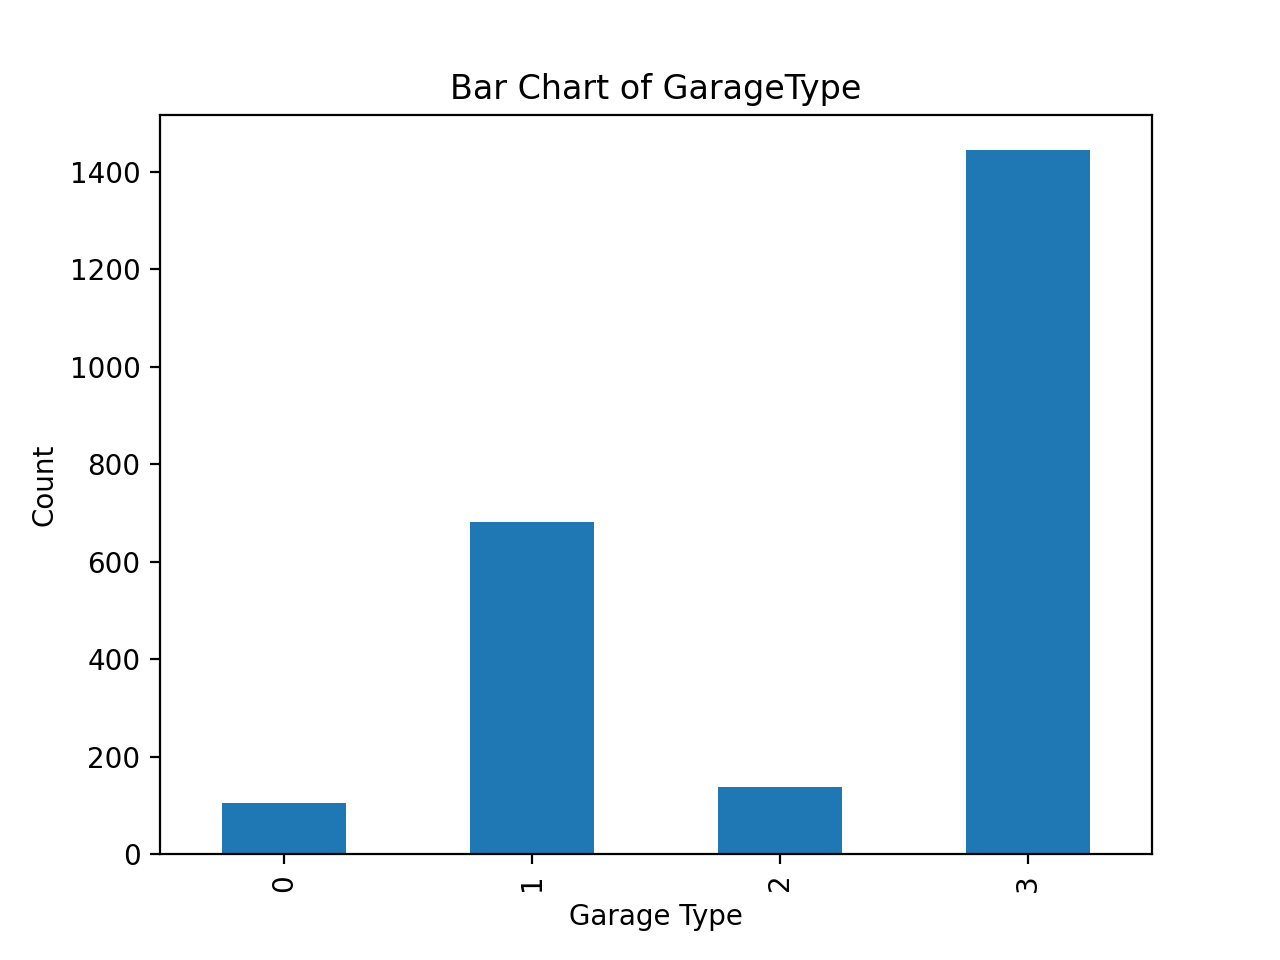

Text(0.5, 1.0, 'Bar Chart of GarageType')

In [13]:
pltGarageTp = GarageTp1.plot.bar()
pltGarageTp.set_xlabel('Garage Type')
pltGarageTp.set_ylabel('Count')
pltGarageTp.set_title('Bar Chart of GarageType')

#### `BsmtFinTp`

In [14]:
BsmtFinTp1 = finaldata['BsmtFinTp'].value_counts().sort_index()
BsmtFinTp1

0     700
1    1670
Name: BsmtFinTp, dtype: int64

<IPython.core.display.Javascript object>


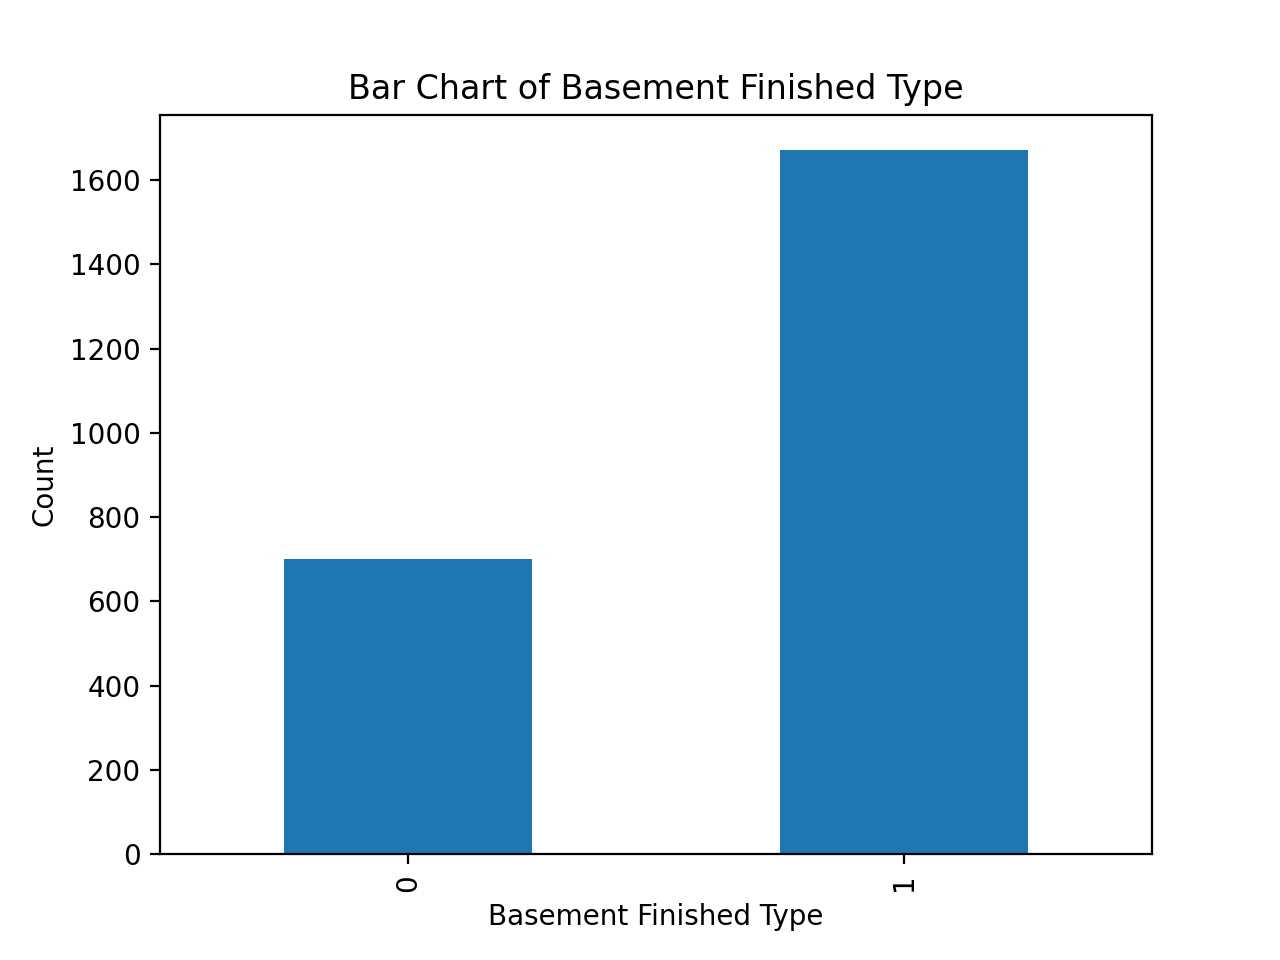

Text(0.5, 1.0, 'Bar Chart of Basement Finished Type')

In [15]:
pltBsmtFinTp = BsmtFinTp1.plot.bar()
pltBsmtFinTp.set_xlabel('Basement Finished Type')
pltBsmtFinTp.set_ylabel('Count')
pltBsmtFinTp.set_title('Bar Chart of Basement Finished Type')

#### `BldgTp`

In [16]:
BldgTp1 = finaldata['BldgTp'].value_counts().sort_index()
BldgTp1

0     291
1    2079
Name: BldgTp, dtype: int64

<IPython.core.display.Javascript object>


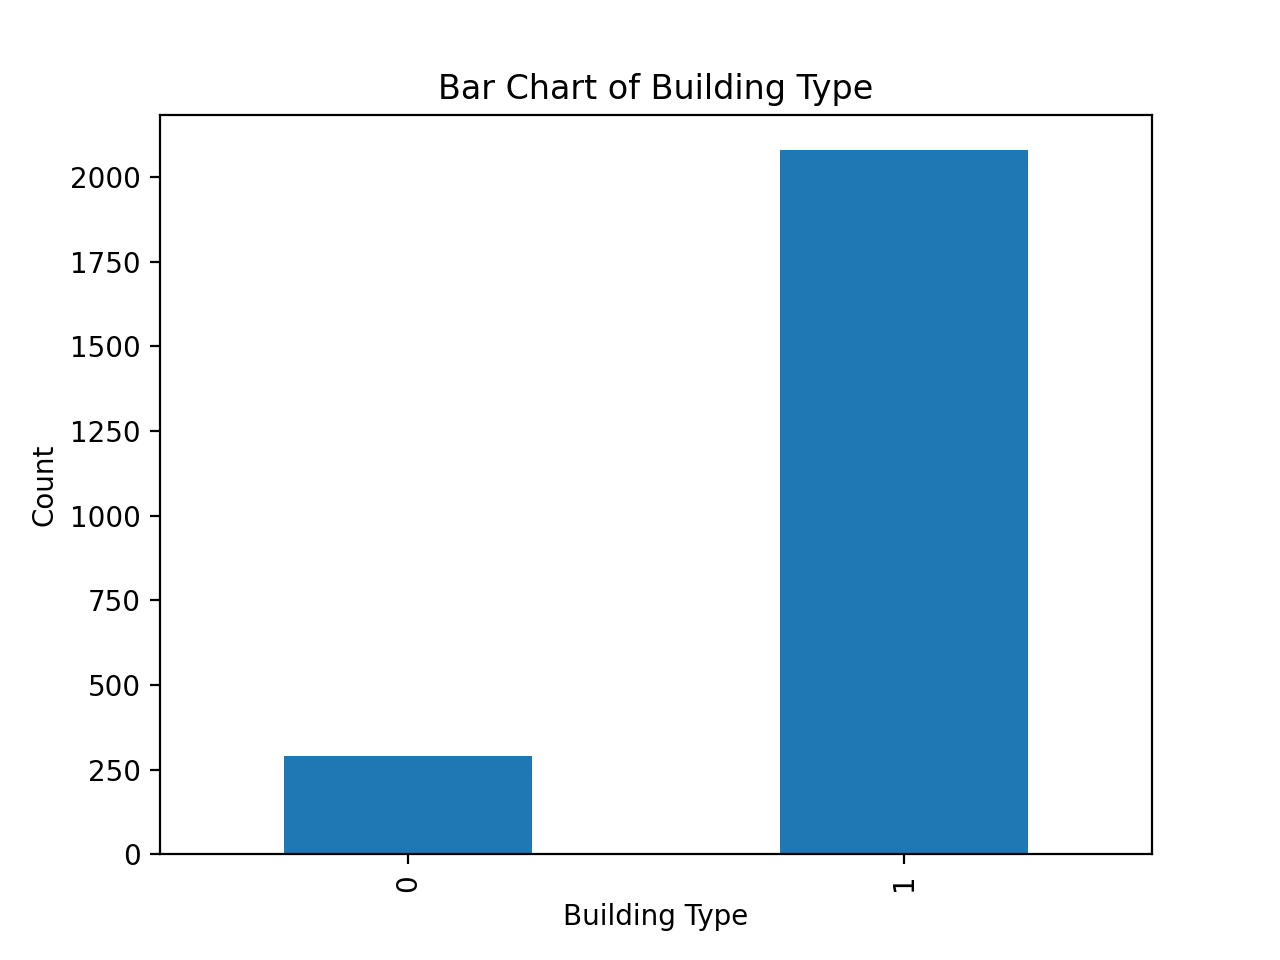

Text(0.5, 1.0, 'Bar Chart of Building Type')

In [17]:
pltBldgTp = BldgTp1.plot.bar()
pltBldgTp.set_xlabel('Building Type')
pltBldgTp.set_ylabel('Count')
pltBldgTp.set_title('Bar Chart of Building Type')

#### `FullBathBsmt`

In [19]:
FullBathBsmt1 = finaldata['FullBathBsmt'].value_counts().sort_index()
FullBathBsmt1

0    1384
1     986
Name: FullBathBsmt, dtype: int64

<IPython.core.display.Javascript object>


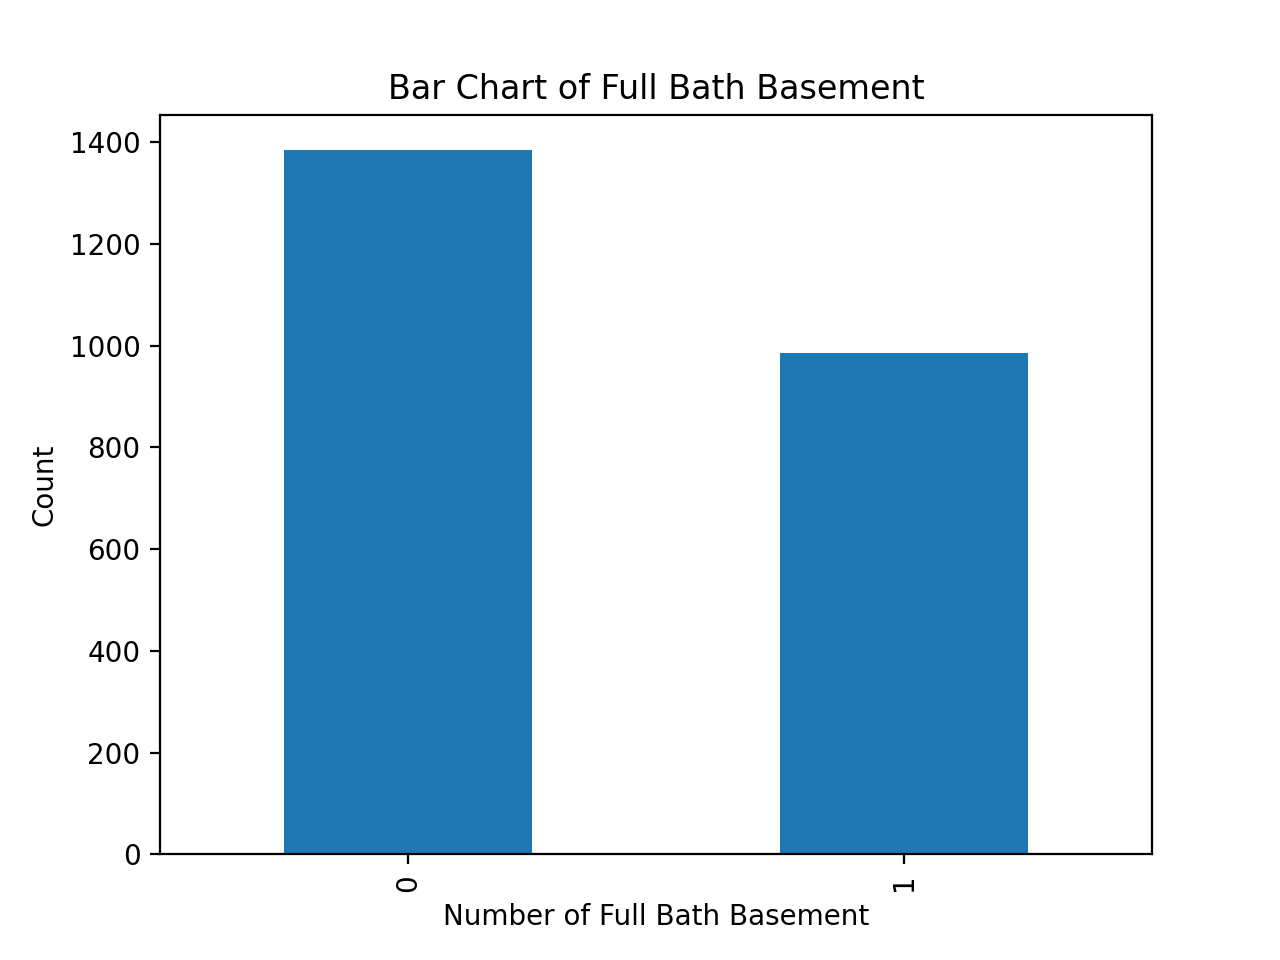

Text(0.5, 1.0, 'Bar Chart of Full Bath Basement')

In [20]:
pltFullBathBsmt = FullBathBsmt1.plot.bar()
pltFullBathBsmt.set_xlabel('Number of Full Bath Basement')
pltFullBathBsmt.set_ylabel('Count')
pltFullBathBsmt.set_title('Bar Chart of Full Bath Basement')

#### `HalfBathHouse`

In [21]:
HalfBathHouse1 = finaldata['HalfBathHouse'].value_counts().sort_index()
HalfBathHouse1

0    1488
1     882
Name: HalfBathHouse, dtype: int64

### For the bar chart I have added the colors, If you want to change/remove them please feel free to..

### Preprocessing the Train Dataset

The models to build include: (1) multiple regression, (2) k-nearest-neighbor algorithm with locally weighted averaging (LWA) method. Thus, the input variables need to be preprocessed for these models.

According to the correlation, there are 21 variables including the target variable **SalePrice** 

- There is 1 target variable that is `"SalePrice"`, after preprocessing all input variables, should apply z-standardization to the target.
- There are 4 binary variables that we need to convert them to flag variables :`LotShape`, `FullBathBsmt`, `HalfBathHouse`, `BsmtFinTp`
- The interval variables, there is no need to do anything before standardization: `VeneerExterior`, "`BsmtFinSqft`, `BsmtUnfinSqft`, `HeatingQC`", `FstFlrSqft`, `SecFlrSqft`, `AbvGrndLiving`, `FullBathHouse`, `BdrmAbvGrnd`, `RmAbvGrnd`, `Fireplaces`, `GarageTp`, `GarageCars`, `GarageArea`, `WdDckSqft`, `OpenPrchSqft`

In [22]:
print(f'Total number of preprocessing input variables: {finaldata.drop(columns=["SalePrice", "YearBuilt", "YearRemodel", "BsmtUnfinSqft", "BsmtFinTp", "BldgTp","OverallCondition"]).shape[1]}')

Total number of preprocessing input variables: 21


### Convert binary variables into unweighted flag variables

#### `LotShape`

In [23]:
LotShape_flag = pd.get_dummies(finaldata['LotShape'], prefix='LotShape').astype(np.float)
print('"LotShape_flag" has a shape:', LotShape_flag.shape)
LotShape_flag.head()

"LotShape_flag" has a shape: (2370, 2)


,LotShape_0,LotShape_1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


#### `FullBathBsmt`

In [24]:
FullBathBsmt_flag = pd.get_dummies(finaldata['FullBathBsmt'], prefix='FullBathBsmt').astype(np.float)
print('"FullBathBsmt_flag" has a shape:', FullBathBsmt_flag.shape)
FullBathBsmt_flag.head()

"FullBathBsmt_flag" has a shape: (2370, 2)


,FullBathBsmt_0,FullBathBsmt_1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


#### `HalfBathHouse`

In [25]:
HalfBathHouse_flag = pd.get_dummies(finaldata['HalfBathHouse'], prefix='HalfBathHouse').astype(np.float)
print('HalfBathHouse_flag has a shape:', HalfBathHouse_flag.shape)
HalfBathHouse_flag.head()

HalfBathHouse_flag has a shape: (2370, 2)


,HalfBathHouse_0,HalfBathHouse_1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


#### `BsmtFinTp`

In [26]:
BsmtFinTp_flag = pd.get_dummies(finaldata['BsmtFinTp'], prefix='BsmtFinTp').astype(np.float)
print('BsmtFinTp_flag has a shape:', BsmtFinTp_flag.shape)
BsmtFinTp_flag.head()

BsmtFinTp_flag has a shape: (2370, 2)


,BsmtFinTp_0,BsmtFinTp_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [27]:
#check all the 4 binary and nominal variables
Dummy = pd.get_dummies(finaldata, columns=['LotShape','FullBathBsmt','HalfBathHouse','BsmtFinTp'], prefix = ['LotShape','FullBathBsmt','HalfBathHouse','BsmtFinTp'], drop_first=True) 
Dummy.head()

,PID,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,...,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice,LotArea,BldgTp,LotShape_1,FullBathBsmt_1,HalfBathHouse_1,BsmtFinTp_1
0,526301100,6,5,1960,1960,112,639,441,0,1656,...,528,210,62,215000,31770,1,0,1,0,1
1,526350040,5,6,1961,1961,0,468,270,1,896,...,730,140,0,105000,11622,1,1,0,0,1
2,526351010,6,6,1958,1958,108,923,406,1,1329,...,312,393,36,172000,14267,1,0,0,1,1
3,526353030,7,5,1968,1968,0,1065,1045,3,2110,...,522,0,0,244000,11160,1,1,1,1,1
4,527105010,5,5,1997,1998,0,791,137,2,928,...,482,212,34,189900,13830,1,0,0,1,1


In [28]:
# shape of Dummy
Dummy.shape

(2370, 28)

In [29]:
#Dataframe for PID and binary
PID1 = pd.DataFrame(Dummy['PID'])
binary1 = pd.DataFrame(Dummy[['PID','LotShape_1', 'BsmtFinTp_1', 'FullBathBsmt_1', 'HalfBathHouse_1']])
#Sanity Check
display(PID1.head(), binary1.head())

,PID
0,526301100
1,526350040
2,526351010
3,526353030
4,527105010


,PID,LotShape_1,BsmtFinTp_1,FullBathBsmt_1,HalfBathHouse_1
0,526301100,0,1,1,0
1,526350040,1,1,0,0
2,526351010,0,1,0,1
3,526353030,1,1,1,1
4,527105010,0,1,0,1


### KNN Model 
(1) standardize all interval variables

In [30]:
# 16 columns are interval or equivalent to interval variables for which we will look "median" imputation
interval_variables = ['VeneerExterior', 'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft', 'AbvGrndLiving', 'FullBathHouse', 
                      'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars', 'GarageArea', 'WdDckSqft', 'OpenPrchSqft']

In [31]:
interval_variables1 = Dummy[interval_variables].copy()

In [32]:
interval = pd.DataFrame(interval_variables1, columns =interval_variables , index = interval_variables1.index)
display(interval.shape, interval.dtypes)

(2370, 16)

VeneerExterior    int64
BsmtFinSqft       int64
BsmtUnfinSqft     int64
HeatingQC         int64
FstFlrSqft        int64
SecFlrSqft        int64
AbvGrndLiving     int64
FullBathHouse     int64
BdrmAbvGrnd       int64
RmAbvGrnd         int64
Fireplaces        int64
GarageTp          int64
GarageCars        int64
GarageArea        int64
WdDckSqft         int64
OpenPrchSqft      int64
dtype: object

In [33]:
# Sanity Check
print('After imputation, the dataframe has {} missing values.'.format(interval.isnull().sum().sum()))

After imputation, the dataframe has 0 missing values.


In [34]:
# creating an instance of class
z_scaler = preprocessing.StandardScaler()
# using the instance
z = z_scaler.fit_transform(interval)
dfZ_Transformed = pd.DataFrame(z, columns = interval.columns, index= interval.index)
dfZ_Transformed = dfZ_Transformed.add_suffix('_z')
#Sanity check
dfZ_Transformed.head()

,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,RmAbvGrnd_z,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z
0,0.150336,0.511861,-0.282762,-2.281286,1.567525,-0.800760,0.470986,-1.012751,0.247145,0.532453,2.237915,0.759526,0.396435,0.354417,0.981410,0.249057
1,-0.555464,0.093454,-0.699227,-1.221990,-0.640431,-0.800760,-1.234949,-1.012751,-1.099367,-0.903987,-0.935198,0.759526,-1.014303,1.376856,0.400936,-0.716193
2,0.125129,1.206758,-0.368003,-1.221990,0.617523,-0.800760,-0.263015,-1.012751,0.247145,-0.185767,-0.935198,0.759526,-1.014303,-0.738884,2.498934,-0.155725
3,-0.555464,1.554206,1.188261,0.896603,2.886488,-0.800760,1.490057,0.980787,0.247145,1.250673,2.237915,0.759526,0.396435,0.324048,-0.760011,-0.716193
4,-0.555464,0.883777,-1.023144,-0.162694,-0.547464,0.925362,0.410380,0.980787,0.247145,-0.185767,0.651359,0.759526,0.396435,0.121585,0.997995,-0.186862


In [35]:
#creating a copy
dfZ_Transformed_copy = dfZ_Transformed.copy()
dfZ_Transformed_copy.insert(0,"PID", PID1)

In [36]:
# Inner join
dfZ_Transformed_copy1 = dfZ_Transformed_copy.merge(binary1, on = "PID", how = "inner")

In [37]:
# Sanity check
dfZ_Transformed_copy1.head()

,PID,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,...,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z,LotShape_1,BsmtFinTp_1,FullBathBsmt_1,HalfBathHouse_1
0,526301100,0.150336,0.511861,-0.282762,-2.281286,1.567525,-0.800760,0.470986,-1.012751,0.247145,...,2.237915,0.759526,0.396435,0.354417,0.981410,0.249057,0,1,1,0
1,526350040,-0.555464,0.093454,-0.699227,-1.221990,-0.640431,-0.800760,-1.234949,-1.012751,-1.099367,...,-0.935198,0.759526,-1.014303,1.376856,0.400936,-0.716193,1,1,0,0
2,526351010,0.125129,1.206758,-0.368003,-1.221990,0.617523,-0.800760,-0.263015,-1.012751,0.247145,...,-0.935198,0.759526,-1.014303,-0.738884,2.498934,-0.155725,0,1,0,1
3,526353030,-0.555464,1.554206,1.188261,0.896603,2.886488,-0.800760,1.490057,0.980787,0.247145,...,2.237915,0.759526,0.396435,0.324048,-0.760011,-0.716193,1,1,1,1
4,527105010,-0.555464,0.883777,-1.023144,-0.162694,-0.547464,0.925362,0.410380,0.980787,0.247145,...,0.651359,0.759526,0.396435,0.121585,0.997995,-0.186862,0,1,0,1


In [38]:
# For linear regression
X = dfZ_Transformed_copy1

#Sanity check
display(X.shape, X.isnull().sum().sum())

(2370, 21)

0

In [39]:
SalePrice = pd.DataFrame(finaldata['SalePrice'])
SalePrice

,SalePrice
0,215000
1,105000
2,172000
3,244000
4,189900
...,...
2365,131000
2366,142500
2367,131000
2368,132000


### Standardizing and Transforming the y value

In [40]:
y_Scaler = preprocessing.StandardScaler()
y = pd.DataFrame(y_Scaler.fit_transform(SalePrice), columns = ['SalePrice'])

#sanity check
y.head()

,SalePrice
0,0.644154
1,-1.072790
2,-0.027015
3,1.096803
4,0.252379


In [41]:
# Adjust the weight of all 4 flag variables from 1 to 0.707
Z_Knn1 = pd.DataFrame(dfZ_Transformed_copy1['LotShape_1'].replace(to_replace={1: 0.707})) 
Z_Knn2 = pd.DataFrame(dfZ_Transformed_copy1['BsmtFinTp_1'].replace(to_replace={1: 0.707}))
Z_Knn3 = pd.DataFrame(dfZ_Transformed_copy1['FullBathBsmt_1'].replace(to_replace={1: 0.707}))
Z_Knn4 = pd.DataFrame(dfZ_Transformed_copy1['HalfBathHouse_1'].replace(to_replace={1: 0.707}))

In [42]:
new_df= pd.DataFrame(Z_Knn1)
new_df.insert(1,"BsmtFinTp_1",Z_Knn2)
new_df.insert(2,"FullBathBsmt_1",Z_Knn3)
new_df.insert(3,"HalfBathHouse_1",Z_Knn4)
new_df.insert(0,"PID", PID1)

In [43]:
Z_Knn_copy = dfZ_Transformed_copy.merge(new_df, on='PID', how='inner')

In [44]:
# Sanity Check of Z_Knn_copy
display(Z_Knn_copy.shape, Z_Knn_copy.head(), Z_Knn_copy.tail())

(2370, 21)

,PID,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,...,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z,LotShape_1,BsmtFinTp_1,FullBathBsmt_1,HalfBathHouse_1
0,526301100,0.150336,0.511861,-0.282762,-2.281286,1.567525,-0.800760,0.470986,-1.012751,0.247145,...,2.237915,0.759526,0.396435,0.354417,0.981410,0.249057,0.000,0.707,0.707,0.000
1,526350040,-0.555464,0.093454,-0.699227,-1.221990,-0.640431,-0.800760,-1.234949,-1.012751,-1.099367,...,-0.935198,0.759526,-1.014303,1.376856,0.400936,-0.716193,0.707,0.707,0.000,0.000
2,526351010,0.125129,1.206758,-0.368003,-1.221990,0.617523,-0.800760,-0.263015,-1.012751,0.247145,...,-0.935198,0.759526,-1.014303,-0.738884,2.498934,-0.155725,0.000,0.707,0.000,0.707
3,526353030,-0.555464,1.554206,1.188261,0.896603,2.886488,-0.800760,1.490057,0.980787,0.247145,...,2.237915,0.759526,0.396435,0.324048,-0.760011,-0.716193,0.707,0.707,0.707,0.707
4,527105010,-0.555464,0.883777,-1.023144,-0.162694,-0.547464,0.925362,0.410380,0.980787,0.247145,...,0.651359,0.759526,0.396435,0.121585,0.997995,-0.186862,0.000,0.707,0.000,0.707


,PID,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,...,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z,LotShape_1,BsmtFinTp_1,FullBathBsmt_1,HalfBathHouse_1
2365,923251180,-0.555464,1.943251,-1.356803,0.896603,0.312476,-0.80076,-0.498704,-1.012751,1.593656,...,0.651359,-1.220756,0.396435,0.597373,3.170624,-0.716193,0.707,0.707,0.707,0.0
2366,923275080,-0.555464,0.952288,-0.908677,-1.221990,-0.329574,-0.80076,-0.994772,-1.012751,0.247145,...,-0.935198,-1.220756,0.396435,0.658112,0.235087,-0.716193,0.000,0.707,0.707,0.0
2367,923276100,-0.555464,-0.315165,-0.774726,-1.221990,-0.623000,-0.80076,-1.221481,-1.012751,-1.099367,...,-0.935198,0.759526,0.396435,0.131708,0.599956,-0.716193,0.000,0.707,0.707,0.0
2368,923400125,-0.555464,-0.227079,0.043591,-1.221990,-0.425446,-0.80076,-1.068845,-1.012751,0.247145,...,-0.935198,-2.210897,-2.425041,-2.318096,-0.096613,-0.217999,0.707,0.707,0.000,0.0
2369,924100070,-0.555464,1.568887,-0.881887,-0.162694,0.791835,-0.80076,-0.128336,-1.012751,-1.099367,...,0.651359,0.759526,0.396435,-0.202356,1.230184,-0.124588,0.707,0.707,0.707,0.0


In [45]:
# X_Knn for kNN with PID
X_Knn = Z_Knn_copy

# Sanity check
X_Knn.shape, X_Knn.isnull().sum().sum()

((2370, 21), 0)

## Import the Score Dataset

In [46]:
dfScore = pd.read_csv('Score_Data-No_Sale_Price.csv')

#### Exploring/Understanding the score dataset

In [47]:
# Sanity Check
dfScore.head()

,PID,LotArea,LotShape,BldgTp,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,...,HalfBathHouse,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft
0,528445060,8987,1,1,8,5,2005,2006,226.0,0,...,0,2,2.0,6.0,1,3,3,880,144,0
1,528456160,9215,1,1,7,5,2009,2010,0.0,0,...,0,2,2.0,4.0,0,3,2,676,0,136
2,528458070,8640,1,1,7,5,2009,2009,0.0,1,...,1,2,3.0,7.0,0,3,2,614,169,45
3,906380190,6762,1,1,7,5,2006,2006,24.0,1,...,0,2,2.0,6.0,0,3,2,632,105,61
4,906385010,10402,0,1,7,5,2009,2009,0.0,0,...,0,2,3.0,6.0,0,3,3,740,0,36


In [48]:
# Shape of the Score dataset
print('The shape of score:',dfScore.shape)

The shape of score: (100, 27)


In [49]:
# Check the columns of score dataset
dfScore.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp', 'OverallQuality',
       'OverallCondition', 'YearBuilt', 'YearRemodel', 'VeneerExterior',
       'BsmtFinTp', 'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft',
       'SecFlrSqft', 'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse',
       'FullBathHouse', 'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp',
       'GarageCars', 'GarageArea', 'WdDckSqft', 'OpenPrchSqft'],
      dtype='object')

In [50]:
dfScore.describe()

,PID,LotArea,LotShape,BldgTp,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,...,HalfBathHouse,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,97.000000,100.000000,...,100.000000,100.000000,95.000000,96.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000
mean,6.576229e+08,9322.570000,0.460000,0.910000,6.520000,5.350000,1990.730000,1993.37000,137.659794,0.670000,...,0.530000,2.520000,2.789474,6.500000,0.540000,2.61000,2.010000,532.280000,108.53000,48.370000
std,1.808138e+08,2775.829625,0.500908,0.287623,1.029661,0.715979,18.079429,15.26444,194.065490,0.472582,...,0.501614,3.608296,0.523790,1.222594,0.610017,0.75069,0.437971,140.276788,123.17471,45.848599
min,5.271631e+08,1680.000000,0.000000,0.000000,4.000000,4.000000,1921.000000,1950.00000,0.000000,0.000000,...,0.000000,1.000000,2.000000,4.000000,0.000000,1.00000,1.000000,186.000000,0.00000,0.000000
25%,5.274515e+08,8126.500000,0.000000,1.000000,6.000000,5.000000,1974.750000,1977.00000,0.000000,0.000000,...,0.000000,2.000000,2.000000,6.000000,0.000000,3.00000,2.000000,440.000000,0.00000,0.000000
50%,5.284571e+08,9008.500000,0.000000,1.000000,7.000000,5.000000,1999.000000,2000.00000,72.000000,1.000000,...,1.000000,2.000000,3.000000,6.000000,0.000000,3.00000,2.000000,528.500000,100.00000,43.500000
75%,9.071821e+08,10461.000000,1.000000,1.000000,7.000000,5.250000,2003.250000,2004.00000,202.000000,1.000000,...,1.000000,2.000000,3.000000,7.000000,1.000000,3.00000,2.000000,614.250000,192.00000,73.250000
max,9.144764e+08,16900.000000,1.000000,1.000000,9.000000,8.000000,2010.000000,2010.00000,1110.000000,1.000000,...,1.000000,20.000000,4.000000,10.000000,2.000000,3.00000,3.000000,908.000000,576.00000,224.000000


In [51]:
# To get the grand count of missing values for the entire score dataset 
# Sanity Check
print('The score dataset has {} missing values.'.format(dfScore.isnull().sum().sum()))

The score dataset has 20 missing values.


In [52]:
# To get a detailed count of missing values for each column
dfScore.isnull().sum()

PID                 0
LotArea             0
LotShape            0
BldgTp              0
OverallQuality      0
OverallCondition    0
YearBuilt           0
YearRemodel         0
VeneerExterior      3
BsmtFinTp           0
BsmtFinSqft         0
BsmtUnfinSqft       0
HeatingQC           0
FstFlrSqft          4
SecFlrSqft          4
AbvGrndLiving       0
FullBathBsmt        0
HalfBathHouse       0
FullBathHouse       0
BdrmAbvGrnd         5
RmAbvGrnd           4
Fireplaces          0
GarageTp            0
GarageCars          0
GarageArea          0
WdDckSqft           0
OpenPrchSqft        0
dtype: int64

In [53]:
# To get the missing value columns in the score dataset
print(f'These columns have missing value: {dfScore.columns[dfScore.isnull().sum().astype(bool)].tolist()}')

These columns have missing value: ['VeneerExterior', 'FstFlrSqft', 'SecFlrSqft', 'BdrmAbvGrnd', 'RmAbvGrnd']


In [54]:
# Considering the 4 binary variables
binary1_score = pd.DataFrame(dfScore, columns=['LotShape','FullBathBsmt','HalfBathHouse','BsmtFinTp'])

In [55]:
# Sanity Check
binary1_score.head()

,LotShape,FullBathBsmt,HalfBathHouse,BsmtFinTp
0,1,0,0,0
1,1,0,0,0
2,1,0,1,1
3,1,1,0,1
4,0,0,0,0


In [56]:
PID1_score = pd.DataFrame(dfScore['PID'])
binary1_score.insert(0,'PID', PID1_score)

In [57]:
interval_variables_score = dfScore[interval_variables].copy()
interval_variables_score

,VeneerExterior,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,AbvGrndLiving,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft
0,226.0,0,1595,3,1595.0,0.0,1595,2,2.0,6.0,1,3,3,880,144,0
1,0.0,0,1218,3,1218.0,0.0,1218,2,2.0,4.0,0,3,2,676,0,136
2,0.0,24,732,3,764.0,783.0,1547,2,3.0,7.0,0,3,2,614,169,45
3,24.0,686,501,3,1208.0,0.0,1208,2,2.0,6.0,0,3,2,632,105,61
4,0.0,0,1226,3,1226.0,0.0,1226,2,3.0,6.0,0,3,3,740,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,365.0,0,1704,3,1722.0,1036.0,2758,2,4.0,9.0,1,2,3,814,282,55
96,664.0,1016,556,3,1572.0,1096.0,2668,2,NaN,10.0,2,2,3,726,400,0
97,292.0,866,132,3,1006.0,1040.0,2046,2,3.0,8.0,1,2,3,871,320,62
98,504.0,1149,454,3,1575.0,NaN,1575,2,2.0,NaN,1,3,3,732,216,28


### Performing z transformation: Score dataset 

In [58]:
z_score = z_scaler.fit_transform(interval_variables_score)
df_z_score = pd.DataFrame(z_score, columns=interval_variables_score.columns, index=interval_variables_score.index)
df_z_score = df_z_score.add_suffix('_z')

# Sanity Check
df_z_score.head()

,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,RmAbvGrnd_z,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z
0,0.457573,-1.068477,2.277984,0.586588,1.500716,-0.863939,0.173038,-0.144838,-1.515229,-0.411113,0.757876,0.522139,2.271814,2.491301,0.289416,-1.060309
1,-0.713032,-1.068477,1.371704,0.586588,0.322029,-0.863939,-0.799028,-0.144838,-1.515229,-2.055566,-0.889680,0.522139,-0.022948,1.029707,-0.885545,1.920919
2,-0.713032,-1.004822,0.203396,0.586588,-1.097399,0.433471,0.049274,-0.144838,0.404061,0.411113,-0.889680,0.522139,-0.022948,0.585497,0.493402,-0.073873
3,-0.588720,0.750997,-0.351911,0.586588,0.290764,-0.863939,-0.824812,-0.144838,-1.515229,-0.411113,-0.889680,0.522139,-0.022948,0.714462,-0.028803,0.276860
4,-0.713032,-1.068477,1.390935,0.586588,0.347041,-0.863939,-0.778401,-0.144838,0.404061,-0.411113,-0.889680,0.522139,2.271814,1.488247,-0.885545,-0.271160


In [59]:
df_z_score.insert(0,'PID', PID1_score)

In [60]:
df_z_Score_LinearCopy = df_z_score.merge(binary1_score, on='PID', how='inner')
df_z_Score_LinearCopy

,PID,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,...,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z,LotShape,FullBathBsmt,HalfBathHouse,BsmtFinTp
0,528445060,0.457573,-1.068477,2.277984,0.586588,1.500716,-0.863939,0.173038,-0.144838,-1.515229,...,0.757876,0.522139,2.271814,2.491301,0.289416,-1.060309,1,0,0,0
1,528456160,-0.713032,-1.068477,1.371704,0.586588,0.322029,-0.863939,-0.799028,-0.144838,-1.515229,...,-0.889680,0.522139,-0.022948,1.029707,-0.885545,1.920919,1,0,0,0
2,528458070,-0.713032,-1.004822,0.203396,0.586588,-1.097399,0.433471,0.049274,-0.144838,0.404061,...,-0.889680,0.522139,-0.022948,0.585497,0.493402,-0.073873,1,0,1,1
3,906380190,-0.588720,0.750997,-0.351911,0.586588,0.290764,-0.863939,-0.824812,-0.144838,-1.515229,...,-0.889680,0.522139,-0.022948,0.714462,-0.028803,0.276860,1,1,0,1
4,906385010,-0.713032,-1.068477,1.390935,0.586588,0.347041,-0.863939,-0.778401,-0.144838,0.404061,...,-0.889680,0.522139,2.271814,1.488247,-0.885545,-0.271160,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,528118040,1.177547,-1.068477,2.540012,0.586588,1.897781,0.852685,3.171746,-0.144838,2.323351,...,0.757876,-0.816680,2.271814,2.018433,1.415420,0.145335,0,0,1,0
96,528166120,2.726268,1.626255,-0.219695,0.586588,1.428807,0.952104,2.939688,-0.144838,NaN,...,2.405432,-0.816680,2.271814,1.387941,2.378235,-1.060309,0,1,1,1
97,528170070,0.799431,1.228411,-1.238959,0.586588,-0.340788,0.859313,1.335908,-0.144838,0.404061,...,0.757876,-0.816680,2.271814,2.426819,1.725479,0.298780,1,1,1,1
98,528172080,1.897521,1.979010,-0.464895,0.586588,1.438186,NaN,0.121470,-0.144838,-1.515229,...,0.757876,0.522139,2.271814,1.430929,0.876896,-0.446527,0,1,0,1


#### Create KNN

In [61]:
df_z_score_Knn1 = pd.DataFrame(df_z_Score_LinearCopy['LotShape'].replace(to_replace={1: 0.707}))  
df_z_score_Knn2 = pd.DataFrame(df_z_Score_LinearCopy['BsmtFinTp'].replace(to_replace={1: 0.707})) 
df_z_score_Knn3 = pd.DataFrame(df_z_Score_LinearCopy['FullBathBsmt'].replace(to_replace={1: 0.707})) 
df_z_score_Knn4 = pd.DataFrame(df_z_Score_LinearCopy['HalfBathHouse'].replace(to_replace={1: 0.707})) 

In [62]:
new_score = pd.DataFrame(df_z_score_Knn1) 
new_score.insert(1,"BsmtFinTp",df_z_score_Knn2) 
new_score.insert(2,"FullBathBsmt",df_z_score_Knn3) 
new_score.insert(3,"HalfBathHouse",df_z_score_Knn4) 
new_score.insert(0,"PID", PID1_score)

In [63]:
df_z_Score_KNNCopy = df_z_score.merge(new_score, on='PID', how='inner') 
df_z_Score_KNNCopy 

,PID,VeneerExterior_z,BsmtFinSqft_z,BsmtUnfinSqft_z,HeatingQC_z,FstFlrSqft_z,SecFlrSqft_z,AbvGrndLiving_z,FullBathHouse_z,BdrmAbvGrnd_z,...,Fireplaces_z,GarageTp_z,GarageCars_z,GarageArea_z,WdDckSqft_z,OpenPrchSqft_z,LotShape,BsmtFinTp,FullBathBsmt,HalfBathHouse
0,528445060,0.457573,-1.068477,2.277984,0.586588,1.500716,-0.863939,0.173038,-0.144838,-1.515229,...,0.757876,0.522139,2.271814,2.491301,0.289416,-1.060309,0.707,0.000,0.000,0.000
1,528456160,-0.713032,-1.068477,1.371704,0.586588,0.322029,-0.863939,-0.799028,-0.144838,-1.515229,...,-0.889680,0.522139,-0.022948,1.029707,-0.885545,1.920919,0.707,0.000,0.000,0.000
2,528458070,-0.713032,-1.004822,0.203396,0.586588,-1.097399,0.433471,0.049274,-0.144838,0.404061,...,-0.889680,0.522139,-0.022948,0.585497,0.493402,-0.073873,0.707,0.707,0.000,0.707
3,906380190,-0.588720,0.750997,-0.351911,0.586588,0.290764,-0.863939,-0.824812,-0.144838,-1.515229,...,-0.889680,0.522139,-0.022948,0.714462,-0.028803,0.276860,0.707,0.707,0.707,0.000
4,906385010,-0.713032,-1.068477,1.390935,0.586588,0.347041,-0.863939,-0.778401,-0.144838,0.404061,...,-0.889680,0.522139,2.271814,1.488247,-0.885545,-0.271160,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,528118040,1.177547,-1.068477,2.540012,0.586588,1.897781,0.852685,3.171746,-0.144838,2.323351,...,0.757876,-0.816680,2.271814,2.018433,1.415420,0.145335,0.000,0.000,0.000,0.707
96,528166120,2.726268,1.626255,-0.219695,0.586588,1.428807,0.952104,2.939688,-0.144838,NaN,...,2.405432,-0.816680,2.271814,1.387941,2.378235,-1.060309,0.000,0.707,0.707,0.707
97,528170070,0.799431,1.228411,-1.238959,0.586588,-0.340788,0.859313,1.335908,-0.144838,0.404061,...,0.757876,-0.816680,2.271814,2.426819,1.725479,0.298780,0.707,0.707,0.707,0.707
98,528172080,1.897521,1.979010,-0.464895,0.586588,1.438186,NaN,0.121470,-0.144838,-1.515229,...,0.757876,0.522139,2.271814,1.430929,0.876896,-0.446527,0.000,0.707,0.707,0.000


### Modelling and Evaluation

#### 1. Linear Regression Modelling 

In [64]:
regRFE = lm.LinearRegression()

In [65]:
# containing 15 most significant inputs
rfe15 = RFE(regRFE, n_features_to_select = 15)

In [66]:
rfe15.fit(X= X, y= y['SalePrice'])

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [67]:
# get the names of the retained 15 columns
display(X.columns[rfe15.get_support()].shape[0],
        X.columns[rfe15.get_support()])

15

Index(['VeneerExterior_z', 'BsmtFinSqft_z', 'BsmtUnfinSqft_z', 'HeatingQC_z',
       'FstFlrSqft_z', 'SecFlrSqft_z', 'AbvGrndLiving_z', 'FullBathHouse_z',
       'BdrmAbvGrnd_z', 'Fireplaces_z', 'GarageCars_z', 'GarageArea_z',
       'LotShape_1', 'FullBathBsmt_1', 'HalfBathHouse_1'],
      dtype='object')

In [68]:
# fit 19 times each with a different n_features_to_select value
df_retained = pd.DataFrame()
for i in range(1, 21, 1):
    # linear regression instance
    rfetemp = RFE(regRFE, n_features_to_select = i)
    rfetemp.fit(X = X, y = y['SalePrice'])
    df_retained['retained_' + str(i)] = rfetemp.get_support()

display(df_retained.shape, df_retained.sum())

(21, 20)

retained_1      1
retained_2      2
retained_3      3
retained_4      4
retained_5      5
retained_6      6
retained_7      7
retained_8      8
retained_9      9
retained_10    10
retained_11    11
retained_12    12
retained_13    13
retained_14    14
retained_15    15
retained_16    16
retained_17    17
retained_18    18
retained_19    19
retained_20    20
dtype: int64

In [69]:
# using the 19 iterations of selected features
# calculating X-valid scores
lm_regression = lm.LinearRegression()
df_xvalid = pd.DataFrame()
for label, content in df_retained.iteritems():
    selected_labels = X.columns[content.to_numpy()]
    df_xvalid[label] = cross_val_score(lm_regression, X = X[selected_labels], y = y['SalePrice'], cv = 10, scoring = 'neg_mean_squared_error')

df_xvalid.shape

(10, 20)

In [70]:
xvalid_mean = df_xvalid.mean()
xvalid_mean

retained_1    -0.615948
retained_2    -0.357091
retained_3    -0.275768
retained_4    -0.248416
retained_5    -0.219171
retained_6    -0.214117
retained_7    -0.212392
retained_8    -0.205647
retained_9    -0.202563
retained_10   -0.200756
retained_11   -0.194033
retained_12   -0.194572
retained_13   -0.192530
retained_14   -0.189391
retained_15   -0.187300
retained_16   -0.186889
retained_17   -0.185580
retained_18   -0.184089
retained_19   -0.183826
retained_20   -0.184018
dtype: float64

#### Linear Regression Evaluation

<IPython.core.display.Javascript object>


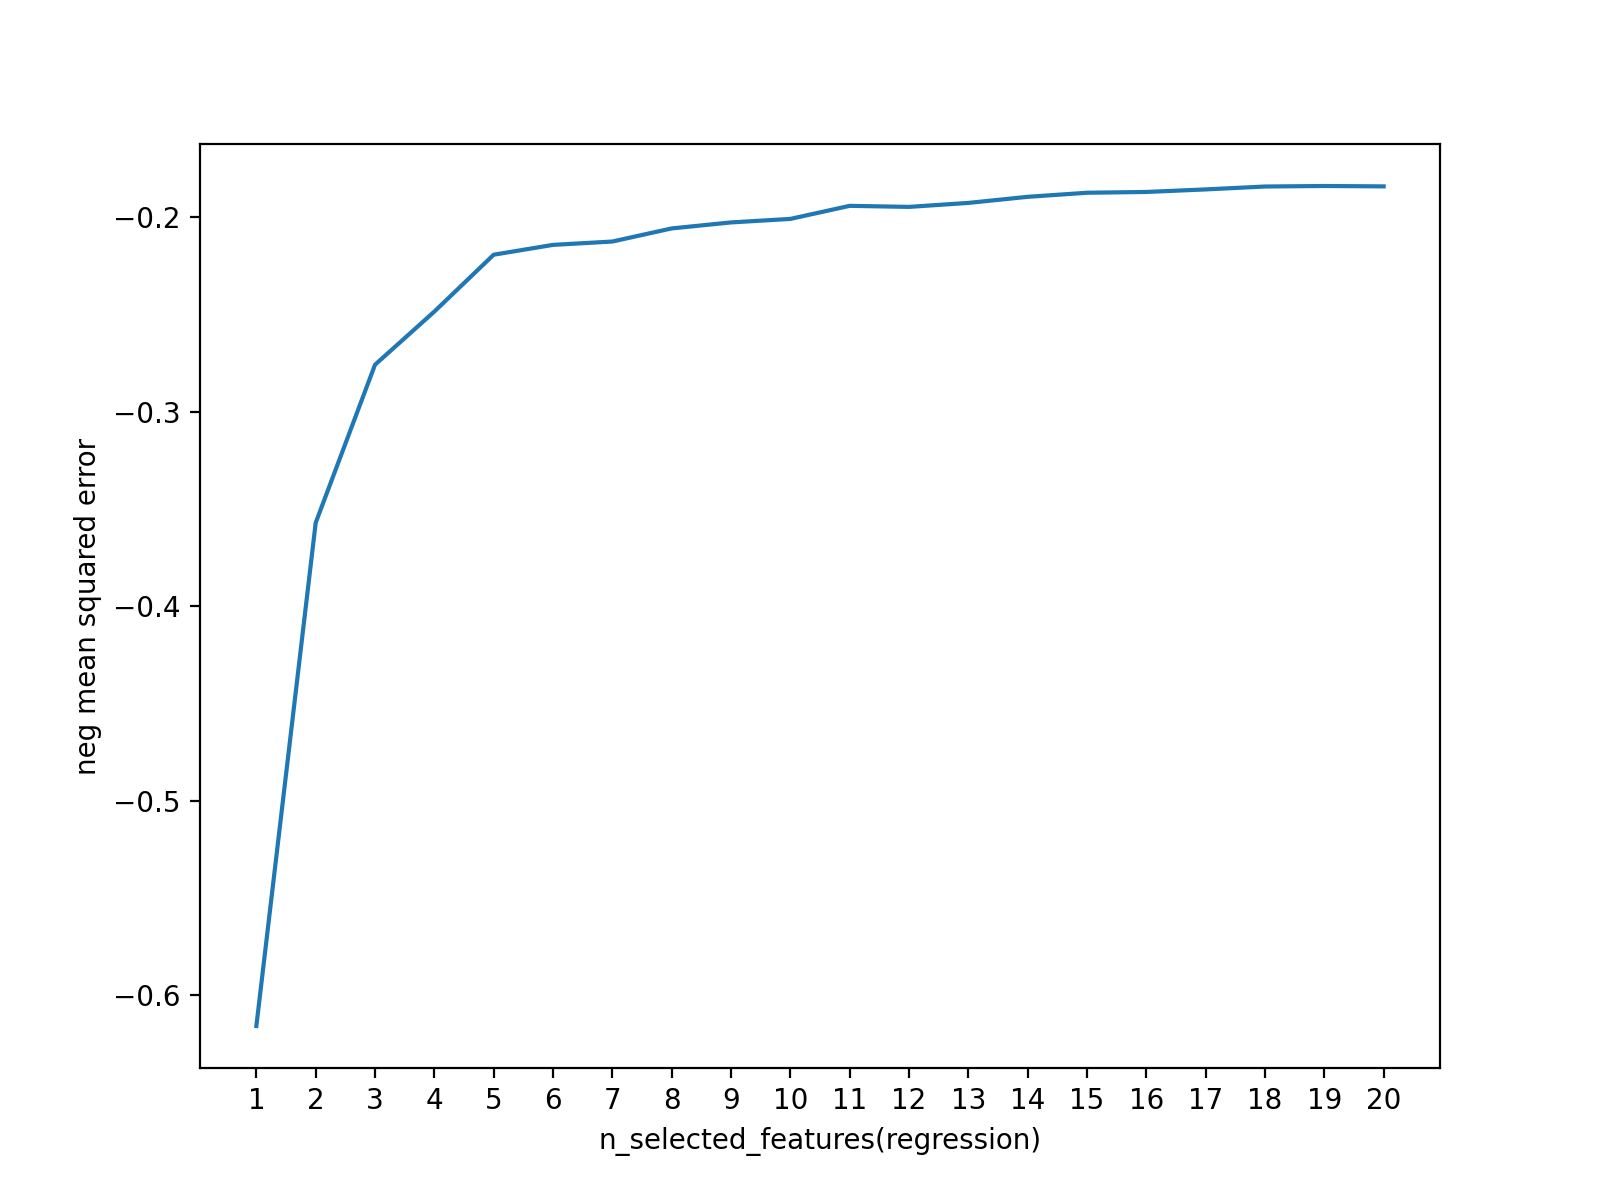

In [71]:
newfig = plt.figure(figsize=(8,6))
numbering = pd.Series(xvalid_mean.index).apply(lambda x:x[9:]).astype(int)
xvalid_mean_copy = xvalid_mean.copy()
xvalid_mean_copy.index = numbering
figX_lmReg = xvalid_mean_copy.plot.line()
#labels
figX_lmReg.set_xlabel('n_selected_features(regression)')
figX_lmReg.set_ylabel('neg mean squared error')
figX_lmReg.set_xticks(numbering)

In [72]:
xvalid_mean.sort_values(ascending=False)

retained_19   -0.183826
retained_20   -0.184018
retained_18   -0.184089
retained_17   -0.185580
retained_16   -0.186889
retained_15   -0.187300
retained_14   -0.189391
retained_13   -0.192530
retained_11   -0.194033
retained_12   -0.194572
retained_10   -0.200756
retained_9    -0.202563
retained_8    -0.205647
retained_7    -0.212392
retained_6    -0.214117
retained_5    -0.219171
retained_4    -0.248416
retained_3    -0.275768
retained_2    -0.357091
retained_1    -0.615948
dtype: float64

**Observation** from above:
- Regression model with **19** selected features has the highest x-valid score (i.e., largest mean "neg_mean_squared_error").
1. Model "retained_19" is the best x-valid performance model of regression model.
2. Above is the precise, sorted results.


#### 2. KNN Modelling

In [73]:
df_xvalid_knn = pd.DataFrame()
for i in range(4, 100):
    # kNN instance
    knn_temp = knn.KNeighborsRegressor(n_neighbors=i, weights='distance')
    df_xvalid_knn['k_' + str(i)] = cross_val_score(knn_temp, X = X_Knn, y = y['SalePrice'], cv = 10, scoring = 'neg_mean_squared_error')

df_xvalid_knn.shape

(10, 96)

In [74]:
n_neighbors = np.floor(Z_Knn_copy.shape[0] / 500).astype(int)
n_neighbors

4

In [75]:
xvalid_mean_knn = df_xvalid_knn.mean()
xvalid_mean_knn

k_4    -0.349840
k_5    -0.345350
k_6    -0.341425
k_7    -0.339211
k_8    -0.338371
          ...   
k_95   -0.325608
k_96   -0.325632
k_97   -0.325646
k_98   -0.325653
k_99   -0.325640
Length: 96, dtype: float64

#### KNN Evaluation

<IPython.core.display.Javascript object>


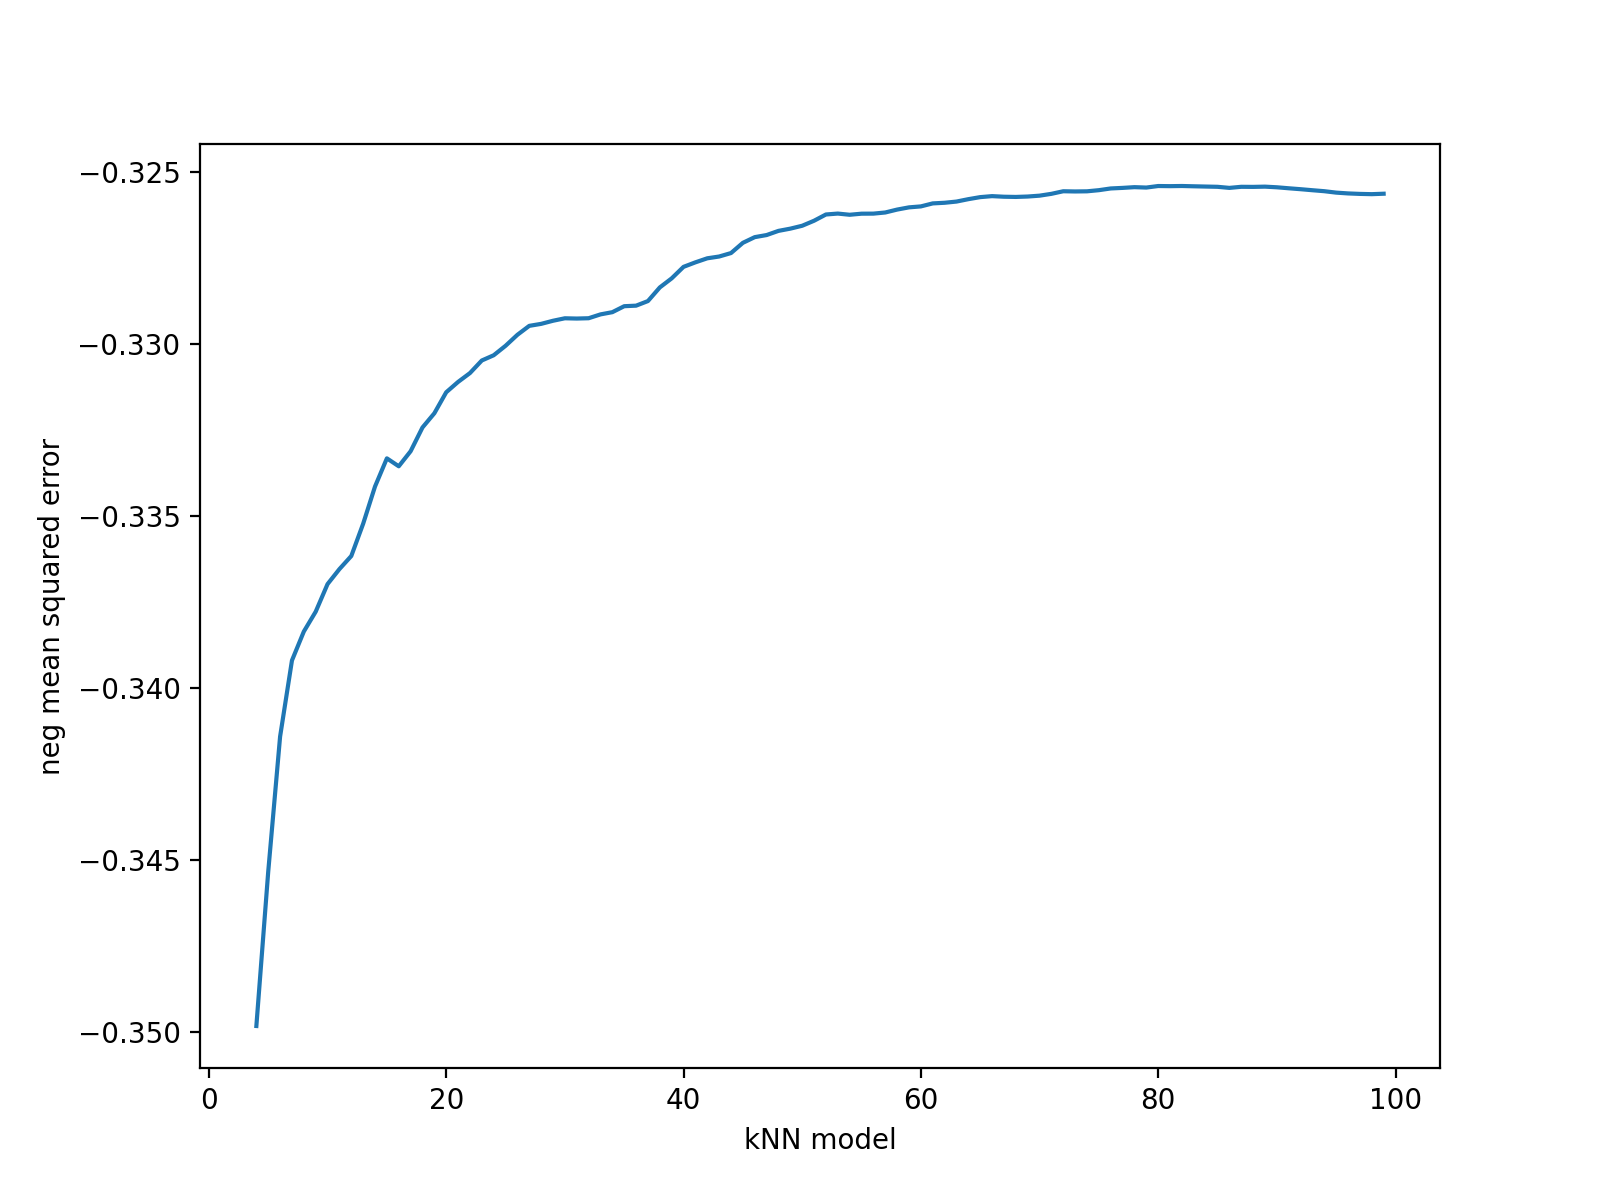

Text(0, 0.5, 'neg mean squared error')

In [76]:
newfig = plt.figure(figsize=(8,6))
knn_numbering = pd.Series(xvalid_mean_knn.index).apply(lambda x:x[2:]).astype(np.int)
xvalid_mean_knn_copy = xvalid_mean_knn.copy()
xvalid_mean_knn_copy.index = knn_numbering
figX_Knn = xvalid_mean_knn_copy.plot.line()

#labels
figX_Knn.set_xlabel('kNN model')
figX_Knn.set_ylabel('neg mean squared error')

In [77]:
xvalid_mean_knn.sort_values(ascending=False)

k_82   -0.325416
k_80   -0.325416
k_81   -0.325420
k_83   -0.325424
k_84   -0.325432
          ...   
k_8    -0.338371
k_7    -0.339211
k_6    -0.341425
k_5    -0.345350
k_4    -0.349840
Length: 96, dtype: float64

**Observation** from above:
- kNN model with **k = 82** has the highest x-valid score (i.e., largest mean "neg_mean_squared_error").
1. Model "k_82" is the best x-valid performance model of kNN model.
2. Above is the precise, sorted results.

### Selecting the best model

##### For Linear Regression

In [78]:
# Best regression model features boolean series: n_selected_features = 19
best_model = df_retained[df_retained.columns[df_retained.columns == 'retained_19']]
best_model = np.squeeze(best_model)
best_model.sum()

19

In [79]:
# Checking for the mean of the retained_19
best_model_crosscheck = cross_val_score(lm_regression, X= X[X.columns[best_model]], y= y['SalePrice'], cv=10,  scoring='neg_mean_squared_error')
best_model_crosscheck.mean()

-0.18382560621262303

##### For KNN

In [80]:
# KNN model for k = 82
knn = knn.KNeighborsRegressor(n_neighbors=82, weights='distance')
xvalid_best_knn = cross_val_score(knn, X=X_Knn, y=y['SalePrice'], cv=10, scoring='neg_mean_squared_error')
xvalid_best_knn.mean()

-0.3254158786045827

In [81]:
# Checking for best model means
print('Is the best x-valid regression model better than the best x-valid kNN (LWA) model?', 
      best_model_crosscheck.mean() > xvalid_best_knn.mean())

Is the best x-valid regression model better than the best x-valid kNN (LWA) model? True


### Prediction

In [82]:
X_score_Regression_final = df_z_Score_LinearCopy
X_score_KNN_final = df_z_Score_KNNCopy

In [83]:
# KNN
impute_median = SimpleImputer(strategy = 'median')
impute_Columns = ['VeneerExterior_z', 'FstFlrSqft_z', 'SecFlrSqft_z', 'BdrmAbvGrnd_z', 'RmAbvGrnd_z']
df_impute_Columns = df_z_Score_KNNCopy[impute_Columns].copy()
df_impute_intervals = pd.DataFrame(impute_median.fit_transform(df_impute_Columns),columns = impute_Columns, index = df_impute_Columns.index)
df_impute_intervals.insert(0,'PID',PID1_score)
df_impute_intervals

,PID,VeneerExterior_z,FstFlrSqft_z,SecFlrSqft_z,BdrmAbvGrnd_z,RmAbvGrnd_z
0,528445060,0.457573,1.500716,-0.863939,-1.515229,-0.411113
1,528456160,-0.713032,0.322029,-0.863939,-1.515229,-2.055566
2,528458070,-0.713032,-1.097399,0.433471,0.404061,0.411113
3,906380190,-0.588720,0.290764,-0.863939,-1.515229,-0.411113
4,906385010,-0.713032,0.347041,-0.863939,0.404061,-0.411113
...,...,...,...,...,...,...
95,528118040,1.177547,1.897781,0.852685,2.323351,2.055566
96,528166120,2.726268,1.428807,0.952104,0.404061,2.877793
97,528170070,0.799431,-0.340788,0.859313,0.404061,1.233340
98,528172080,1.897521,1.438186,0.066452,-1.515229,-0.411113


In [84]:
# regression
impute_by_median = SimpleImputer(strategy = 'median')
impute_Columns_reg = ['VeneerExterior_z', 'FstFlrSqft_z', 'SecFlrSqft_z', 'BdrmAbvGrnd_z', 'RmAbvGrnd_z']
df_impute_Columns_reg = df_z_Score_LinearCopy[impute_Columns_reg].copy()
df_impute_intervals_reg = pd.DataFrame(impute_by_median.fit_transform(df_impute_Columns_reg),columns = impute_Columns_reg, index = df_impute_Columns_reg.index)
df_impute_intervals_reg.insert(0,'PID',PID1_score)
df_impute_intervals_reg

,PID,VeneerExterior_z,FstFlrSqft_z,SecFlrSqft_z,BdrmAbvGrnd_z,RmAbvGrnd_z
0,528445060,0.457573,1.500716,-0.863939,-1.515229,-0.411113
1,528456160,-0.713032,0.322029,-0.863939,-1.515229,-2.055566
2,528458070,-0.713032,-1.097399,0.433471,0.404061,0.411113
3,906380190,-0.588720,0.290764,-0.863939,-1.515229,-0.411113
4,906385010,-0.713032,0.347041,-0.863939,0.404061,-0.411113
...,...,...,...,...,...,...
95,528118040,1.177547,1.897781,0.852685,2.323351,2.055566
96,528166120,2.726268,1.428807,0.952104,0.404061,2.877793
97,528170070,0.799431,-0.340788,0.859313,0.404061,1.233340
98,528172080,1.897521,1.438186,0.066452,-1.515229,-0.411113


In [85]:
X_score_KNN_final.drop(['VeneerExterior_z'], axis=1, inplace=True)
X_score_KNN_final.drop(['FstFlrSqft_z', 'SecFlrSqft_z', 'BdrmAbvGrnd_z', 'RmAbvGrnd_z'], axis=1, inplace=True)
X_score_KNN_final.columns

Index(['PID', 'BsmtFinSqft_z', 'BsmtUnfinSqft_z', 'HeatingQC_z',
       'AbvGrndLiving_z', 'FullBathHouse_z', 'Fireplaces_z', 'GarageTp_z',
       'GarageCars_z', 'GarageArea_z', 'WdDckSqft_z', 'OpenPrchSqft_z',
       'LotShape', 'BsmtFinTp', 'FullBathBsmt', 'HalfBathHouse'],
      dtype='object')

In [86]:
X_score_Regression_final.drop(['VeneerExterior_z','FstFlrSqft_z', 'SecFlrSqft_z', 'BdrmAbvGrnd_z', 'RmAbvGrnd_z'], axis=1, inplace=True)
X_score_Regression_final.columns

Index(['PID', 'BsmtFinSqft_z', 'BsmtUnfinSqft_z', 'HeatingQC_z',
       'AbvGrndLiving_z', 'FullBathHouse_z', 'Fireplaces_z', 'GarageTp_z',
       'GarageCars_z', 'GarageArea_z', 'WdDckSqft_z', 'OpenPrchSqft_z',
       'LotShape', 'FullBathBsmt', 'HalfBathHouse', 'BsmtFinTp'],
      dtype='object')

In [87]:
X_scoreReg_final = X_score_Regression_final.merge(df_impute_intervals_reg, on='PID', how='inner')
X_scoreReg_final1 = X_scoreReg_final

In [88]:
X_score_KNN_final = X_score_KNN_final.merge(df_impute_intervals, on='PID', how='inner')
X_score_KNN_final1 = X_score_KNN_final

In [89]:
# Checking for the null values in regression model
X_scoreReg_final.isnull().sum().sum()

0

In [90]:
# Checking for the null values in KNN
X_score_KNN_final.isnull().sum().sum()

0

In [91]:
regression1 = lm.LinearRegression()
regression1.fit(X= X[X.columns[best_model]], y=y['SalePrice'])

LinearRegression()

In [92]:
dfscore_SalePrice = regression1.predict(X = X_scoreReg_final[X_scoreReg_final.columns[best_model]])

In [93]:
# sanity check
display(isinstance(dfscore_SalePrice, np.ndarray), dfscore_SalePrice.shape, dfscore_SalePrice.dtype)
print('Mean and Std of predicted Sale Price are: {:.3f} ({:.3f})'.format(np.mean(dfscore_SalePrice), np.std(dfscore_SalePrice)))

True

(100,)

dtype('float64')

Mean and Std of predicted Sale Price are: 0.123 (0.777)


**The target variable `"SalePrice"`, predicted values has mean of `0.123` and std of `0.777` that is the z-standardized scale. Thus, the values have to be converted to its original scale **

<IPython.core.display.Javascript object>


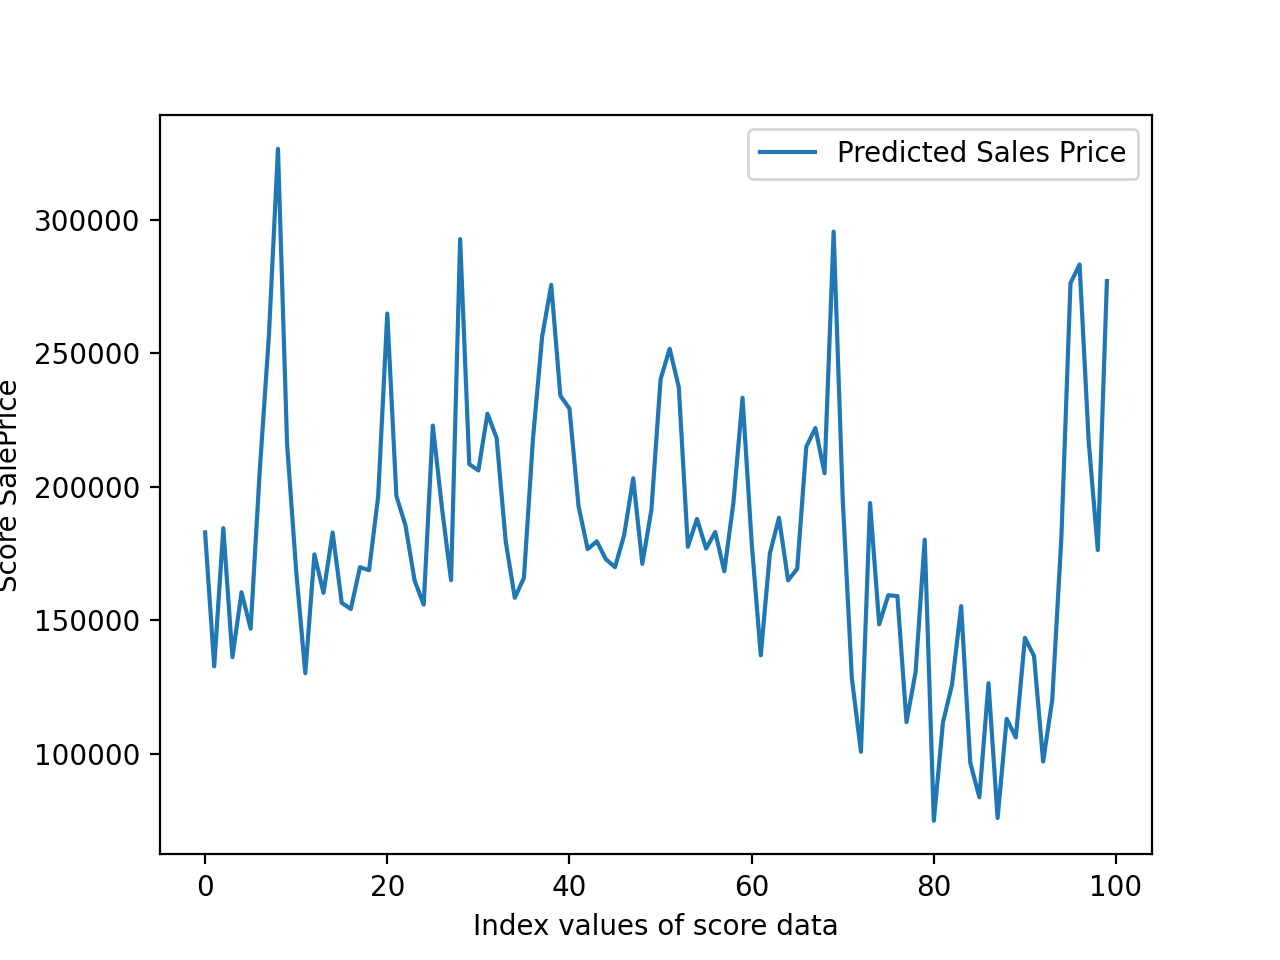

Text(0, 0.5, 'Score SalePrice')

In [94]:
# Inverse transform scale of predicted values of the target variables 
Inverse_target = pd.DataFrame(y_Scaler.inverse_transform(dfscore_SalePrice), columns=['Predicted Sales Price'], index=X_scoreReg_final.index)
pltline = Inverse_target.plot()
# labels
pltline.set_xlabel('Index values of score data')
pltline.set_ylabel('Score SalePrice')

### Final Step in the Project, Save to External driver and generate CSV file

In [95]:
Inverse_target.insert(0,'PID', PID1_score)
Inverse_target

,PID,Predicted Sales Price
0,528445060,182989.121695
1,528456160,132824.214953
2,528458070,184579.972766
3,906380190,136256.123466
4,906385010,160585.402407
...,...,...
95,528118040,276257.488287
96,528166120,283300.109808
97,528170070,217024.295408
98,528172080,176381.901665


In [96]:
Inverse_target.to_csv("SalePrice_predict.csv", index=True)

### Bonuses

#### Top 5 properties with highest predict score

In [97]:
Top5 = Inverse_target['Predicted Sales Price'].nlargest(n=5)
print(Top5)

8     326599.435164
69    295596.735657
28    292780.961370
96    283300.109808
99    277103.427390
Name: Predicted Sales Price, dtype: float64


#### Top 20 properties with highest predict score

In [98]:
Top20 = Inverse_target['Predicted Sales Price'].nlargest(n=20)
print(Top20)

8     326599.435164
69    295596.735657
28    292780.961370
96    283300.109808
99    277103.427390
95    276257.488287
38    275670.185964
20    264920.569692
7     256314.266894
37    256234.456162
51    251755.022518
50    240263.379342
52    237366.521080
39    234165.977454
59    233401.414951
40    229344.021816
31    227421.331029
25    222970.138130
67    222053.965186
32    218372.804947
Name: Predicted Sales Price, dtype: float64
